In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Arin\OneDrive\Desktop\Projects\Cold Start Credit Scoring\application_record.csv")
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [6]:
df.shape

(438557, 18)

In [8]:
print("Shape :", df.shape)
df.info(memory_usage="deep")

Shape : (438557, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 

In [9]:
df.isnull().sum().sort_values(ascending=False).head(10)

OCCUPATION_TYPE      134203
ID                        0
CODE_GENDER               0
FLAG_EMAIL                0
FLAG_PHONE                0
FLAG_WORK_PHONE           0
FLAG_MOBIL                0
DAYS_EMPLOYED             0
DAYS_BIRTH                0
NAME_HOUSING_TYPE         0
dtype: int64

In [23]:
df["AGE_YEARS"]       = (-df["DAYS_BIRTH"]    / 365).round(1)
df["YEARS_EMPLOYED"]  = (-df["DAYS_EMPLOYED"] / 365).round(1)

In [24]:
df["risk_score"] = (
    (df["AMT_INCOME_TOTAL"] < 50000).astype(int) * 0.3 +
    (df["CNT_CHILDREN"]    >= 3).astype(int)     * 0.2 +
    (df["AGE_YEARS"]       > 60).astype(int)     * 0.2 +
    (df["CNT_FAM_MEMBERS"] > 6).astype(int)      * 0.2 +
    (df["OCCUPATION_TYPE"].isna() &
     ~df["NAME_INCOME_TYPE"].isin(["Pensioner","Student"])).astype(int)*0.1
)

df["BAD_CLIENT"] = (df["risk_score"] > 0.2).astype(int)

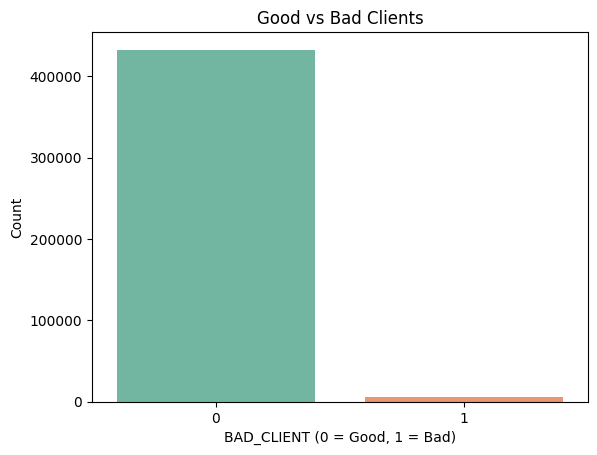

In [25]:
sns.countplot(x="BAD_CLIENT", data=df, palette="Set2")
plt.title("Good vs Bad Clients")
plt.xlabel("BAD_CLIENT (0 = Good, 1 = Bad)")
plt.ylabel("Count")
plt.show()

In [26]:
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED,risk_score,BAD_CLIENT
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,32.9,12.4,0.1,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,32.9,12.4,0.1,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Security staff,2.0,58.8,3.1,0.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,1,1,Sales staff,1.0,52.4,8.4,0.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,1,1,Sales staff,1.0,52.4,8.4,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,...,1,0,0,0,NaN,1.0,62.2,-1000.7,0.2,0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,1,0,0,0,Laborers,1.0,43.7,8.2,0.0,0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,...,1,1,0,0,Sales staff,1.0,22.4,1.0,0.0,0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,NaN,2.0,59.4,-1000.7,0.0,0


In [27]:
df['BAD_CLIENT'].value_counts()

0    432858
1      5699
Name: BAD_CLIENT, dtype: int64

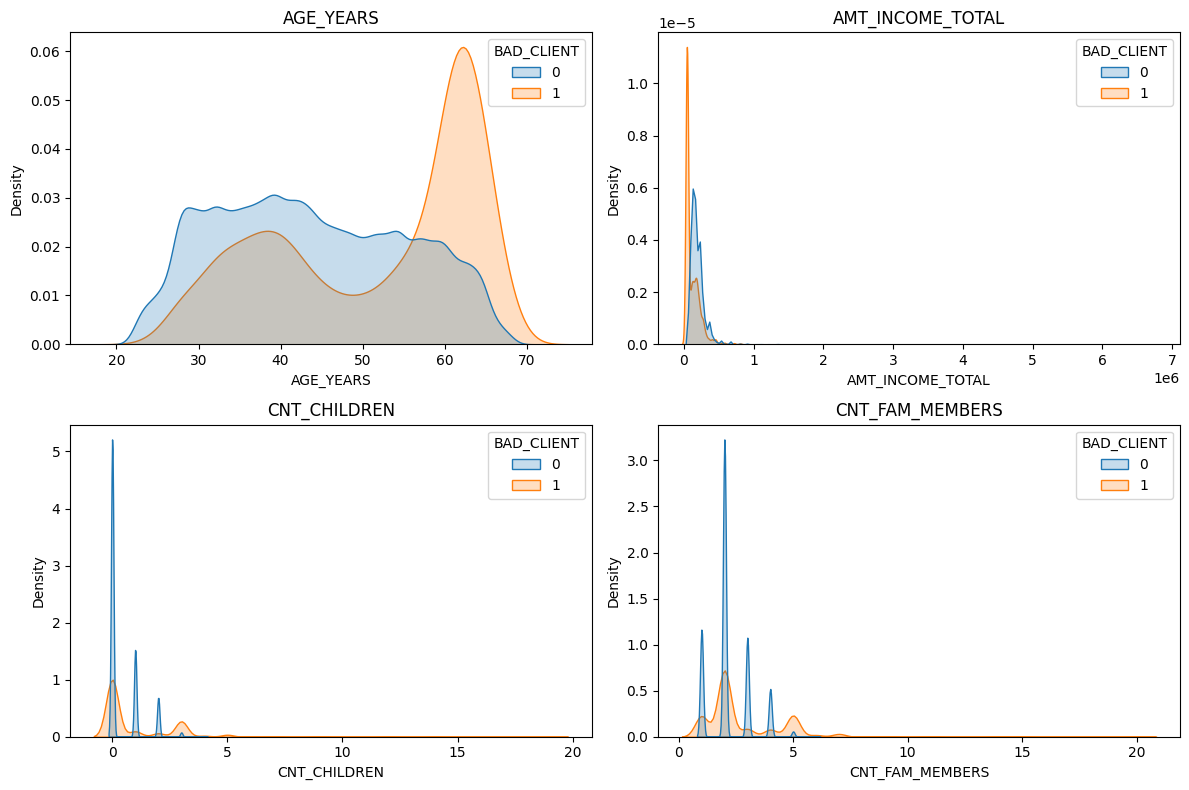

In [28]:
num_cols = ["AGE_YEARS","AMT_INCOME_TOTAL","CNT_CHILDREN","CNT_FAM_MEMBERS"]
plt.figure(figsize=(12,8))
for i,col in enumerate(num_cols,1):
    plt.subplot(2,2,i)
    sns.kdeplot(data=df, x=col, hue="BAD_CLIENT", fill=True, common_norm=False)
    plt.title(col)
plt.tight_layout()
plt.show()

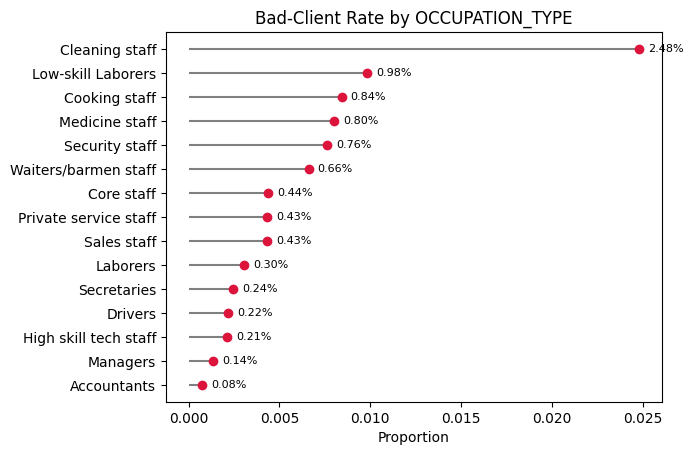

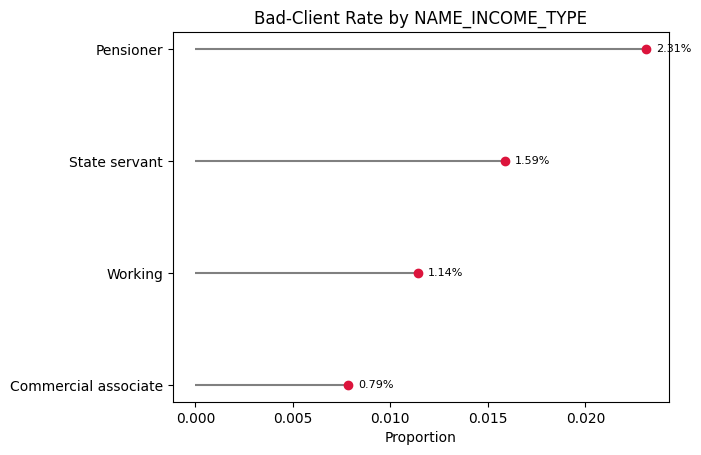

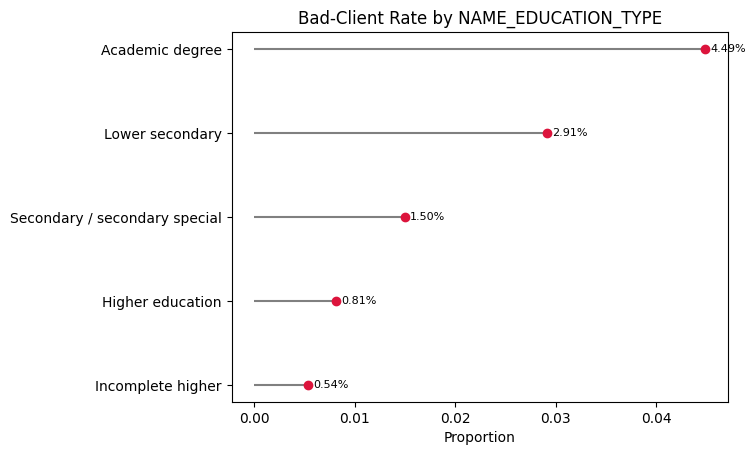

In [45]:
cat_col = "OCCUPATION_TYPE"         
bad_rate = (df[df["BAD_CLIENT"]==1][cat_col]
            .value_counts()/df[cat_col].value_counts()).dropna().sort_values()
plt.hlines(y=bad_rate.index, xmin=0, xmax=bad_rate.values, color="grey")
plt.plot(bad_rate.values, bad_rate.index,"o",color="crimson")
for x,y in zip(bad_rate.values, bad_rate.index):
    plt.text(x+0.0005,y,f"{x:.2%}",va="center",fontsize=8)
plt.title(f"Bad-Client Rate by {cat_col}")
plt.xlabel("Proportion")
plt.show()

cat_col = "NAME_INCOME_TYPE"
bad_rate = (df[df["BAD_CLIENT"]==1][cat_col]
            .value_counts()/df[cat_col].value_counts()).dropna().sort_values()
plt.hlines(y=bad_rate.index, xmin=0, xmax=bad_rate.values, color="grey")
plt.plot(bad_rate.values, bad_rate.index,"o",color="crimson")
for x,y in zip(bad_rate.values, bad_rate.index):
    plt.text(x+0.0005,y,f"{x:.2%}",va="center",fontsize=8)
plt.title(f"Bad-Client Rate by {cat_col}")
plt.xlabel("Proportion")
plt.show()

cat_col = "NAME_EDUCATION_TYPE"
bad_rate = (df[df["BAD_CLIENT"]==1][cat_col]
            .value_counts()/df[cat_col].value_counts()).dropna().sort_values()
plt.hlines(y=bad_rate.index, xmin=0, xmax=bad_rate.values, color="grey")
plt.plot(bad_rate.values, bad_rate.index,"o",color="crimson")
for x,y in zip(bad_rate.values, bad_rate.index):
    plt.text(x+0.0005,y,f"{x:.2%}",va="center",fontsize=8)
plt.title(f"Bad-Client Rate by {cat_col}")
plt.xlabel("Proportion")
plt.show()

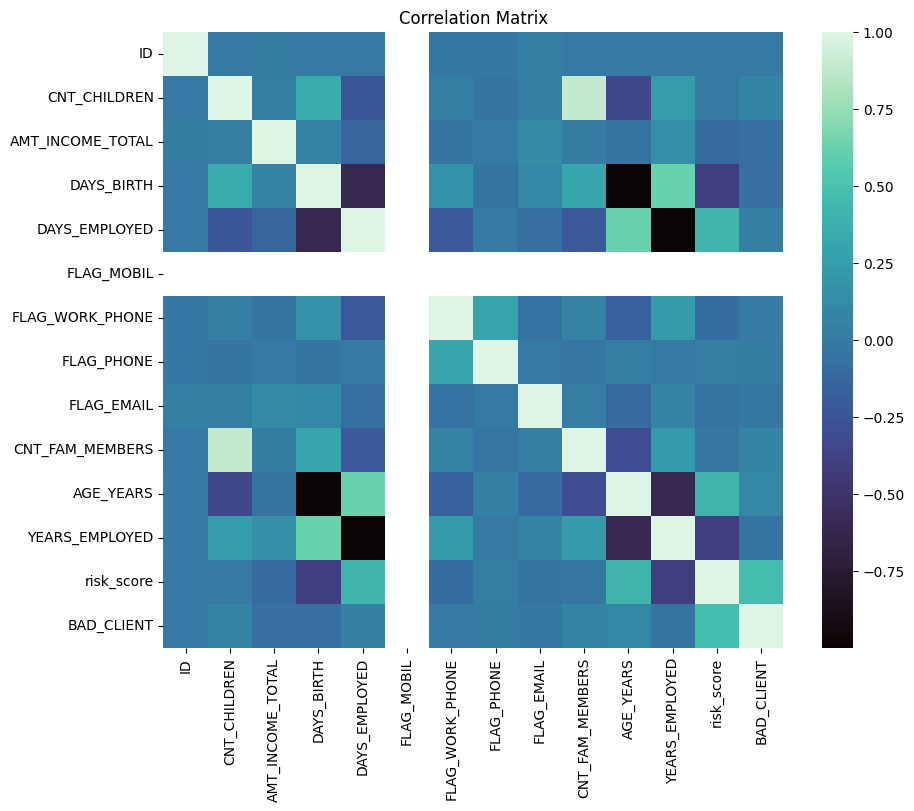

In [48]:
num_df = df.select_dtypes("number")
plt.figure(figsize=(10,8))
sns.heatmap(num_df.corr(), cmap="mako", center=0)
plt.title("Correlation Matrix")
plt.show()

In [49]:
from scipy.stats import chi2_contingency
cat_cols = ["CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY", 
            "NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS",
            "NAME_HOUSING_TYPE","OCCUPATION_TYPE"]
out = []
for c in cat_cols:
    chi2,p,_,_ = chi2_contingency(pd.crosstab(df[c],df["BAD_CLIENT"]))
    out.append((c,p))
pd.DataFrame(out, columns=["Feature","p_value"]).sort_values("p_value")

,Feature,p_value
7,OCCUPATION_TYPE,3.919731e-195
3,NAME_INCOME_TYPE,7.005073e-189
5,NAME_FAMILY_STATUS,4.612039e-147
1,FLAG_OWN_CAR,1.390818e-121
0,CODE_GENDER,6.599644e-105
4,NAME_EDUCATION_TYPE,6.596901e-104
6,NAME_HOUSING_TYPE,5.788364e-28
2,FLAG_OWN_REALTY,4.031999e-01


In [50]:
df.to_csv('application_record_modified.csv')